In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

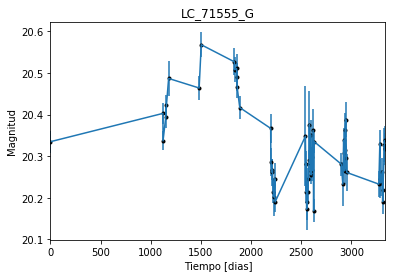

In [11]:
data = np.genfromtxt('LC_71555_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_71555_G')
plt.savefig("LC_71555_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

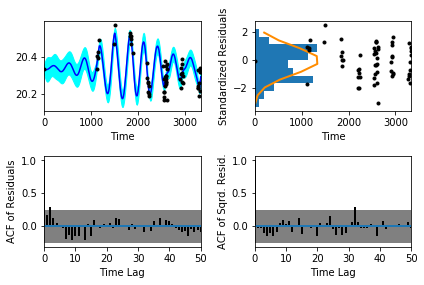

In [5]:
sample.assess_fit()

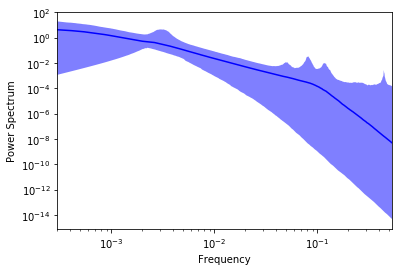

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

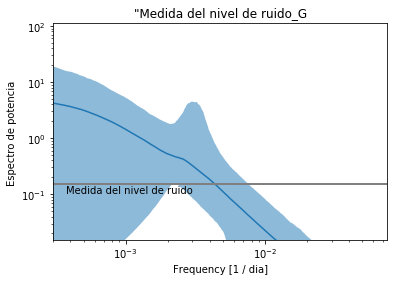

In [12]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_71555_G')
plt.title('"Medida del nivel de ruido_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_71555_G')

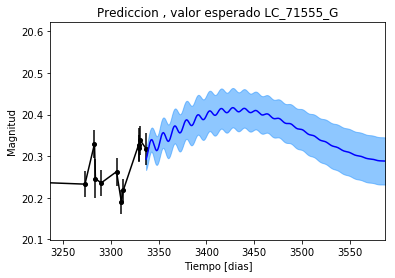

In [13]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_71555_G')

Text(0.5,1,'Prediccion, Caminos simulados  LC_71555_G')

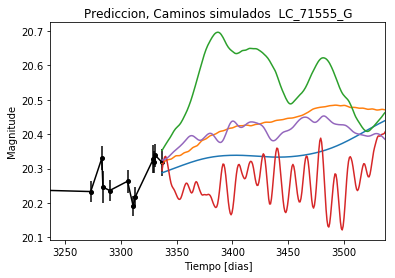

In [14]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_71555_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


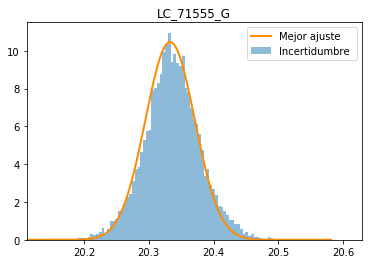

In [15]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_71555_G')
plt.savefig("Mejor_ajuste_LC_71555_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_71555_G')

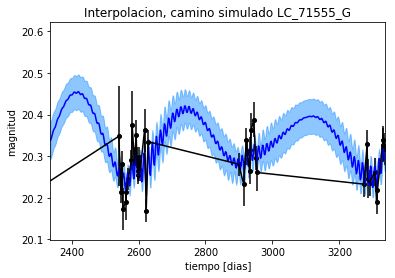

In [16]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_71555_G')

Text(0.5,1,'Interpolacion, camino simulado LC_71555_G')

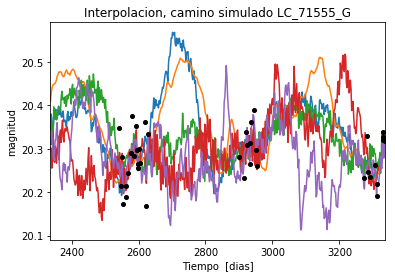

In [17]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_71555_G')

In [18]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [19]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 435.15225243
Median: 0.00741313621468
Standard deviation: 0.151739256084
68% credibility interval: [ 0.00113156  0.08990739]
95% credibility interval: [  3.45148069e-04   6.13275977e-01]
99% credibility interval: [  3.05555657e-04   9.61050993e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 569.509215026
Median: 0.00569833448919
Standard deviation: 0.103785361554
68% credibility interval: [ 0.00081739  0.05891393]
95% credibility interval: [ 0.00033495  0.33225432]
99% credibility interval: [  3.05555657e-04   7.63355927e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 260.707435297
Median: 0.0675725395053
Standard d

In [20]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1024.799386
Median: 116.227187073
Standard deviation: 2.41770140549
68% credibility interval: [ 113.75356495  118.67440701]
95% credibility interval: [ 111.02820088  120.16136153]
99% credibility interval: [ 109.05998917  121.1839558 ]


In [21]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 356.55126147
Median: 1.09073229804
Standard deviation: 2.23628072864
68% credibility interval: [ 0.15424902  4.00573183]
95% credibility interval: [ 0.02857533  7.83312624]
99% credibility interval: [  0.01588921  11.47053821]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 256.522246402
Median: 1.15537753889
Standard deviation: 11.4259903863
68% credibility interval: [  0.21294099  14.49755952]
95% credibility interval: [  1.13636257e-

In [22]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 310.42684642
Median: 1.49650599858e-24
Standard deviation: 1.80139337246e+57
68% credibility interval: [  5.43373405e-55   8.31864165e+25]
95% credibility interval: [  8.70516932e-105   1.36611441e+043]
99% credibility interval: [  3.78752702e-109   6.60147049e+057]


In [23]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2012.42578845
Median: 20.3464173101
Standard deviation: 0.0491891408904
68% credibility interval: [ 20.30299923  20.39027406]
95% credibility interval: [ 20.25048495  20.44687258]
99% credibility interval: [ 20.20271156  20.49190262]


In [24]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 759.121334108
Median: 0.116295194146
Standard deviation: 0.278833676449
68% credibility interval: [ 0.00662055  0.55643196]
95% credibility interval: [ 0.          0.94484338]
99% credibility interval: [ 0.          1.03735336]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 759.121334108
Median: 0.116295194146
Standard deviation: 0.278833676449
68% credibility interval: [ 0.00662055  0.55643196]
95% credibility interval: [ 0.          0.94484338]
99% credibility interval: [ 0.          1.03735336]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 144.003114542
Median: 0.0
Standard deviation: 0.00126076317568
68% credi

In [25]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1024.799386
Median: 116.227187073
Standard deviation: 2.41770140549
68% credibility interval: [ 113.75356495  118.67440701]
95% credibility interval: [ 111.02820088  120.16136153]
99% credibility interval: [ 109.05998917  121.1839558 ]


In [26]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 805.358270273
Median: 0.0121172185305
Standard deviation: 0.00968222435556
68% credibility interval: [ 0.00742063  0.02093821]
95% credibility interval: [ 0.00474673  0.0371381 ]
99% credibility interval: [ 0.00379043  0.06034465]


In [27]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1561.86188949
Median: 1.19946441937
Standard deviation: 0.242972940368
68% credibility interval: [ 0.97422037  1.45738316]
95% credibility interval: [ 0.79576135  1.75704024]
99% credibility interval: [ 0.71985835  1.90769111]


In [28]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 683.947594894
Median: 0.00133753492437
Standard deviation: 0.207304492574
68% credibility interval: [  8.81240638e-30   6.96583904e-02]
95% credibility interval: [  7.94172728e-48   6.45609349e-01]
99% credibility interval: [  6.92431150e-61   1.26925759e+00]


In [29]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 435.15225243
Median: (-0.0465781085442-0.512705715026j)
Standard deviation: 1.99458251388
68% credibility interval: [-0.56490479-0.38912066j -0.00710981-0.00924504j]
95% credibility interval: [ -3.85332661e+00-0.06443861j  -2.16862928e-03-0.01869301j]
99% credibility interval: [ -6.03846148e+00+0.j          -1.91986282e-03-0.00207944j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 569.509215026
Median: (-0.0358036915379+3.54384897226j)
Standard deviation: 1.86938881459
68% credibility interval: [-0.37016711+2.43171194j -0.00513580+0.27409001j]
95% credibility interval: [-2.08761549+6.10282012j -0.00210454+0.j        ]
99% credibility interval: [ -4.79630674e+00 +4.54818948e+00j  -1.91986282e-03 +2.07943932e-03j]
Post